In [10]:
import os
import base64
from openai import AzureOpenAI
from IPython.display import Image
from time import time

# # sub:SubstrateAIServiceDEV, aoai:pawel-aoai
# client = AzureOpenAI(
#     api_key=os.getenv("AZURE_OPENAI_API_KEY"),
#     api_version="2024-02-01",
#     azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
#     )

# client_pva = AzureOpenAI(
#     api_key=os.getenv("AZURE_OPENAI_API_KEY_PVA"),
#     api_version="2024-02-01",
#     azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT_PVA")
# )

# # sub:B360-AI-LAB, aoai:openai-pva
from azure.identity import DefaultAzureCredential
default_credential = DefaultAzureCredential()
token = default_credential.get_token("https://cognitiveservices.azure.com/.default").token
client_pva = AzureOpenAI(
    azure_ad_token=token,
    api_version="2024-02-01",
    azure_endpoint="https://openai-pva2.openai.azure.com/",
)

# # sub:SubstrateAIServiceDEV, aoai:pawel-aoai
# client = AzureOpenAI(
#     azure_ad_token=token,
#     api_version="2024-02-01",
#     azure_endpoint="https://pawel-aoai.openai.azure.com/",
# )

# pawel-aoai
Calls to GPT-35T and GPT-4-0125

In [9]:

deployment_name='35Tinstruct'
# deployment_name='35T'

print('Sending a test completion job')
start_phrase = 'Write a tagline for an ice cream shop. '
response = client.completions.create(model=deployment_name, prompt=start_phrase, max_tokens=100)
print(start_phrase+response.choices[0].text)

Sending a test completion job


AuthenticationError: Error code: 401 - {'error': {'code': 'PermissionDenied', 'message': 'Principal does not have access to API/Operation.'}}

In [4]:
deployment_name='40125'

print('Sending a test completion job')
start_phrase = 'Write a tagline for an ice cream shop that does not start with "scoops". '
messages=[
    {"role": "user", "content": start_phrase}
]

response = client.chat.completions.create(model=deployment_name, messages=messages, max_tokens=100)

print(start_phrase+response.choices[0].message.content)

Sending a test completion job
Write a tagline for an ice cream shop that does not start with "scoops". Lick the Moment at Our Ice Cream Haven!


# openai-pva
Calls to gpt-4o text only and vision

In [5]:
deployment_name='gpt-4o'

print('Sending a test completion job')
start_phrase = 'Write a tagline for an ice cream shop that does not start with "scoops". '
messages=[
    {"role": "user", "content": start_phrase}
]

response = client_pva.chat.completions.create(model=deployment_name, messages=messages, max_tokens=100)

print(start_phrase+response.choices[0].message.content)

Sending a test completion job
Write a tagline for an ice cream shop that does not start with "scoops". "Where Every Flavor Tells a Story"


In [35]:
deployment_name='gpt-4o'

print('Sending a test vision completion job from url')
content = [
            {"type": "text", "text": "What’s in this image?"},
            {
            "type": "image_url",
            "image_url": {"url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",},
            },
        ]

messages=[
    {"role": "user", "content": content}
]

response = client_pva.chat.completions.create(model=deployment_name, messages=messages, max_tokens=100)

print(response.choices[0].message.content)

Sending a test vision completion job from url
The image depicts a serene, scenic landscape with a wooden boardwalk leading through a lush, green field or meadow. The boardwalk stretches into the distance, creating a sense of depth and inviting the viewer to imagine walking through the picturesque setting. Surrounding the boardwalk, there is an abundance of tall grass, bushes, and scattered trees in the distance. The sky above is a bright blue with some scattered, wispy clouds, adding to the peaceful and inviting atmosphere of the scene. This image ex


Sending a test vision completion job from local


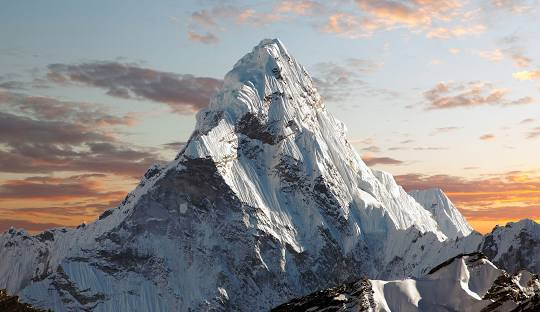

The mountain in the image is Ama Dablam. It is located in the Himalayas of eastern Nepal and is known for its striking, pyramid-like shape. Ama Dablam is a prominent peak visible from the path to Everest Base Camp, and its name means "Mother's Necklace" due to the extended ridges representing the arms of a mother protecting her child and the hanging glacier resembling a traditional double-pendant necklace.


In [25]:
deployment_name='gpt-4o'

print('Sending a test vision completion job from local')

with open("ama_dablam.jpeg", "rb") as image_file:
    image_base64 = base64.b64encode(image_file.read()).decode('utf-8')

content = [
            {"type": "text", "text": "What is the name of this mountain?"},
            {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image_base64}",},
            },
        ]

messages=[
    {"role": "user", "content": content}
]

response = client_pva.chat.completions.create(model=deployment_name, messages=messages, max_tokens=100)

display(Image(filename='ama_dablam.jpeg') )
print(response.choices[0].message.content)

In [37]:
def call_gpt(content, deployment_name, n_iterations):
    messages=[
        {"role": "user", "content": content}
    ]

    times = []
    for _ in range(n_iterations):

        st = time() 
        client_pva.chat.completions.create(model=deployment_name, messages=messages, max_tokens=100)
        et = time()
        times.append(et-st)

    return sum(times)/len(times)

n_iterations = 10
start_phrase = 'Write a one paragraph pitch to convince angel investors to support a new business. '

deployment_name='gpt-4o'
print(f"Mean time, {deployment_name}, text: {call_gpt(start_phrase, deployment_name, n_iterations):.2f}")

deployment_name='gpt-4'
print(f"Mean time, {deployment_name}, text: {call_gpt(start_phrase, deployment_name, n_iterations):.2f}")


Mean time, gpt-4o, text: 1.48
Mean time, gpt-4, text: 10.21
